In [233]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [234]:
from dolfin import *
#Meshandfunctionspace
import matplotlib.pyplot as plt
import numpy as np
import GenerateData as gd
import gmsh
import GenerateGraph as gg

In [227]:
!dolfin-convert data/mesh/DD.msh data/mesh/DD.xml

Converting from Gmsh format (.msh, .gmsh) to DOLFIN XML format
Expecting 161 vertices
Found all vertices
Expecting 270 cells
Found all cells
Conversion done


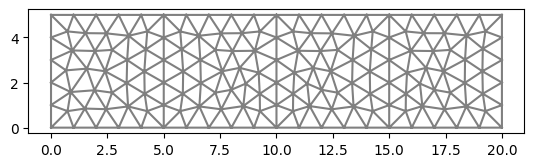

In [235]:
mesh_load = gd.MeshLoader("data/mesh/DD")
mesh = mesh_load.mesh
bounds = mesh_load.bounds
face = mesh_load.face
plot(mesh)

In [236]:
idx = np.where(mesh.coordinates()[:,1] < 3)[0]#and mesh.coordinates()[:,1].any() > 2 )[0]
idx2 = np.where(mesh.coordinates()[:,1] > 2)[0]
idx

array([  0,   2,   4,   6,   8,  10,  11,  12,  13,  18,  19,  20,  21,
        26,  27,  28,  29,  34,  35,  36,  37,  42,  43,  44,  46,  47,
        48,  50,  51,  52,  54,  55,  56,  58,  59,  60,  62,  63,  65,
        66,  67,  69,  70,  75,  76,  77,  79,  81,  83,  84,  86,  88,
        89,  90,  91,  93,  94,  99, 100, 102, 103, 106, 107, 109, 110,
       111, 113, 114, 115, 116, 118, 119, 124, 125, 127, 128, 131, 132,
       134, 135, 136, 137, 139, 140, 141, 143, 144, 148, 150, 152, 153,
       155, 157, 159, 160])

In [237]:
elementi_comuni = np.intersect1d(idx, idx2)

# Stampa gli elementi comuni
print(elementi_comuni)

[ 44  48  52  56  60  62  63  69  79  88  89  93 103 113 114 118 128 136
 137 143 153]


In [238]:
tags = {'walls':[5],'inlet':[6],'outlet':[7], 'interface': [8,9,10], 'faces': [11,12,13,14]}
mesh_load.update_tags(tags)
mesh_load.measure_definition()

(Measure('interior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 31733), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f72bc57a2b0>),
 Measure('exterior_facet', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 31733), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f72bc57a2b0>),
 Measure('cell', subdomain_id='everywhere', domain=Mesh(VectorElement(FiniteElement('Lagrange', triangle, 1), dim=2), 31733), subdomain_data=<dolfin.cpp.mesh.MeshFunctionSizet object at 0x7f72bd5a1cb0>))

In [239]:
set_log_level(False)
V = FunctionSpace(mesh_load.mesh,"DG",1)
k = 50
f = Constant(0.0)
bc = Constant(0.0)
#f = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1]-2.5, 2))',degree=2, a=0.2)
u0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1]-2.5, 2))',degree=2, a=0.01)
T = 5
timesteps = 50
dt = T/ timesteps

heat_gaussian = gd.Heat(mesh_load,'Heat', V,k,f,bc,u0,dt,T, Neumann=True)
heat_gaussian.solve()
#heat_gaussian.plot_solution()
data = gd.DataHeat(heat_gaussian,mesh_load)
data.save_graph(output_dir = "data/graphs_test/")

Graph saved to disk.


Graph(num_nodes=5, num_edges=4,
      ndata_schemes={'x': Scheme(shape=(2,), dtype=torch.float32), 'k': Scheme(shape=(1, 1), dtype=torch.float32), 'NodeId': Scheme(shape=(), dtype=torch.float32), 'inlet_mask': Scheme(shape=(), dtype=torch.float32), 'outlet_mask': Scheme(shape=(), dtype=torch.float32), 'interface_length': Scheme(shape=(1, 1), dtype=torch.float32), 'flux': Scheme(shape=(1, 50), dtype=torch.float32), 'dt': Scheme(shape=(1, 1), dtype=torch.float32), 'T': Scheme(shape=(1, 1), dtype=torch.float32)}
      edata_schemes={'EdgeId': Scheme(shape=(), dtype=torch.float32), 'area': Scheme(shape=(1, 1), dtype=torch.float32), 'length': Scheme(shape=(1, 1), dtype=torch.float32)})

In [241]:
#diffusion of a gaussian function
np.random.seed(50)
for i in range(10):
    set_log_level(False)
    k = round(np.random.uniform(1, 100),2)
    V = FunctionSpace(mesh_load.mesh,"DG",1)
    f = Constant(0.0)
    bc = Constant(0.0)
    #f = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1]-2.5, 2))',degree=2, a=0.2)
    u0 = Expression('exp(-a*pow(x[0], 2) - a*pow(x[1]-2.5, 2))',degree=2, a=0.01)
    T = 5
    timesteps = 50
    dt = T/ timesteps

    heat_gaussian = gd.Heat(mesh_load,'Heat', V,k,f,bc,u0,dt,T, Neumann=True)
    heat_gaussian.solve()
    #heat_gaussian.plot_solution()
    data = gd.DataHeat(heat_gaussian,mesh_load)
    data.save_graph(output_dir = "data/graphs_test/")


Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Graph saved to disk.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) com

In [244]:
import dgl

bo = dgl.data.utils.load_graphs(f"data/graphs_test/k_{k}.grph")
bo[0][0].ndata['flux']

tensor([[[7.9201e-01, 9.1794e-01, 7.8180e-01, 6.5829e-01, 5.5969e-01,
          4.8096e-01, 4.1702e-01, 3.6420e-01, 3.1988e-01, 2.8222e-01,
          2.4986e-01, 2.2181e-01, 1.9732e-01, 1.7582e-01, 1.5686e-01,
          1.4007e-01, 1.2517e-01, 1.1192e-01, 1.0011e-01, 8.9584e-02,
          8.0181e-02, 7.1778e-02, 6.4266e-02, 5.7546e-02, 5.1533e-02,
          4.6151e-02, 4.1334e-02, 3.7021e-02, 3.3158e-02, 2.9700e-02,
          2.6602e-02, 2.3828e-02, 2.1344e-02, 1.9118e-02, 1.7125e-02,
          1.5340e-02, 1.3741e-02, 1.2308e-02, 1.1025e-02, 9.8757e-03,
          8.8462e-03, 7.9240e-03, 7.0980e-03, 6.3580e-03, 5.6953e-03,
          5.1016e-03, 4.5698e-03, 4.0934e-03, 3.6667e-03, 3.2845e-03]],

        [[1.1930e+01, 9.5009e+00, 7.9686e+00, 6.7790e+00, 5.8303e+00,
          5.0587e+00, 4.4202e+00, 3.8839e+00, 3.4276e+00, 3.0353e+00,
          2.6950e+00, 2.3978e+00, 2.1367e+00, 1.9064e+00, 1.7024e+00,
          1.5214e+00, 1.3604e+00, 1.2169e+00, 1.0890e+00, 9.7467e-01,
          8.7254e